Scroll down the the analysis section to see the actual analysis

In [2]:

1+1

2

In [2]:
import pandas as pd
import numpy as np
import glob
import os

# Loading files

In [3]:
path=os.path.expanduser("~/Documents/TaxiTripData/2013taxi_trip_data/")

In [4]:
files=glob.glob(path+'*.csv.zip.gz')

In [5]:
countlist=[]
cunk=100000
for i in files:
    print(i)
    iterate=pd.read_csv(i,usecols=[5],iterator=True,chunksize=cunk,names=['pickup_datetime'],header=0)
    counter=0
    for chunk in iterate:
        a=pd.to_datetime(chunk['pickup_datetime'])
        if a.dtype==np.dtype('<M8[ns]'):
            countlist.append(a.dt.date.value_counts())
        else:
            bads=[]
            for q in range(a.shape[0]):
                b=pd.to_datetime(a.iloc[q])
                if type(b)!=pd.tslib.Timestamp:
                    bads.append(q)
            a.drop(bads,axis=0,inplace=True)
            a=pd.to_datetime(a)
            if a.dtype==np.dtype('<M8[ns]'):
                countlist.append(a.dt.date.value_counts())
            else:
                print('chunk ' + str(counter)+' of file '+i+' encountered a problem and was not processed.')
                
        counter+=1
    

/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_12.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_10.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_5.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_4.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_7.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_9.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_11.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_8.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_1.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_6.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_2.csv.zip.gz
/home/proctortc/Documents/TaxiTripData/2013taxi_trip_data/trip_data_3.csv.zip.gz


In [6]:
cond=pd.concat(countlist)
cond=cond.groupby(cond.index).sum()


2013-01-01    412630
2013-01-02    393001
2013-01-03    441233
2013-01-04    478437
2013-01-05    473804
2013-01-06    403667
2013-01-07    407363
2013-01-08    441778
2013-01-09    457471
2013-01-10    487949
2013-01-11    521398
2013-01-12    507429
2013-01-13    442541
2013-01-14    443650
2013-01-15    496899
2013-01-16    500065
2013-01-17    512533
2013-01-18    543734
2013-01-19    510530
2013-01-20    459393
2013-01-21    384614
2013-01-22    496005
2013-01-23    520520
2013-01-24    533039
2013-01-25    537188
2013-01-26    557203
2013-01-27    470833
2013-01-28    450789
2013-01-29    477380
2013-01-30    482378
               ...  
2013-12-02    427094
2013-12-03    463782
2013-12-04    471838
2013-12-05    498220
2013-12-06    530748
2013-12-07    552655
2013-12-08    488180
2013-12-09    452108
2013-12-10    478456
2013-12-11    485363
2013-12-12    507534
2013-12-13    543606
2013-12-14    516303
2013-12-15    458267
2013-12-16    454088
2013-12-17    481726
2013-12-18   

In [7]:
cond.index=pd.to_datetime(cond.index)


In [ ]:
%pwd

In [8]:
cond.to_pickle('2013_taxi_date_counts.pkl')

# Analysis

In [3]:
cond=pd.read_pickle('2013_taxi_date_counts.pkl')

Some thing seems to be up with the month of September in this data: it has almost double the counts of all the others. It also had some non-date data in the middle of the file. I expect that there may just be repeats in the middle of the file, but I just took it out for this analysis

In [4]:
cond[cond.index.month==9]=np.nan
cond.dropna(inplace=True)

In [12]:
months=pd.DataFrame(cond)
months['month']=months.index.month
months['year']=months.index.year
months=months.groupby(['year','month']).sum()
months.columns=['Pickups']
months=months.append(pd.DataFrame({'year' : [2013], 'month' : [9], 'Pickups':[0]}).groupby(['year','month']).sum()).sort()

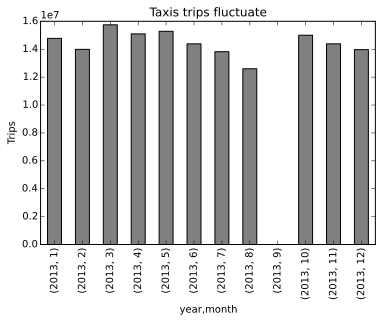

In [13]:
plot=months.plot(kind='bar',title='Taxis trips fluctuate',color='gray',legend=False)
#plot.set_xlabel('Days of the week')
plot.set_ylabel('Trips')
plot.get_figure().savefig('yellowcabyear.pdf')

This fluctuates much more than I would expect, but I don't know if there is really much else to say about it.

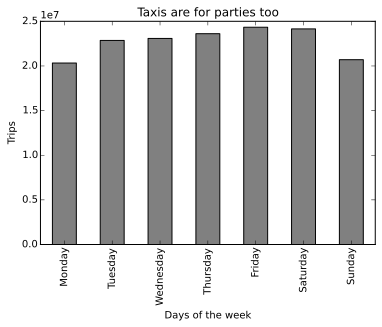

In [6]:
dow=cond.copy()
dow.index=dow.index.weekday
dow=dow.groupby(dow.index).sum()
dow.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plot=dow.plot(kind='bar',title='Taxis are for parties too',color='gray',legend=False)
plot.set_xlabel('Days of the week')
plot.set_ylabel('Trips')
plot.get_figure().savefig('yellowcabweek.pdf')

We see the same thing that we saw in the Uber data; taxis are popular for transportation to weekend entertainment, more so than for commuting.